# Анализ поведения пользователи мобильного приложения стартапа, продающего продукты питания

**Описание проекта:**<br>
Имеется стартап, который продаёт продукты питания. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нужно выяснить, какой шрифт лучше.
Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, можно быть уверенными в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.<br>
<br>
**Цель проекта:** <br>Разобраться, как ведут себя пользователи мобильного приложения. 
Изучить воронку продаж. Узнать, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
После этого исследовать результаты A/A/B-эксперимента.<br>
<br>
**Этапы проекта:**
1. Открыть файл с данными и изучите общую информацию<br>
2. Подготовить данные<br>
3. Изучить и проверить данные<br>
4. Изучить воронку событий<br>
5. Изучить результаты эксперимента

## Откроем файл с данными и изучим общую информацию:

In [6]:
import pandas as pd # подгружаем библиотеки
import os
import datetime as dt
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings
import math as mth
from scipy import stats as st
import plotly.express as px
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [7]:
pth1 = 'C:/Users/volsi/Documents/Обучение Яндекс/Проекты/Сборный проект 2/logs_exp.csv'
pth2 = '/datasets/logs_exp.csv'

if os.path.exists(pth1):
    data = pd.read_csv (pth1, sep= '\t' )
elif os.path.exists(pth2):
    data = pd.read_csv(pth2,  sep= '\t')
else:
    print('Something is wrong')
display (data)    

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


## Подготовим данные:

**Заменим названия столбцов на удобные:**

In [8]:
data = data.rename(columns = {'EventName' : 'event', 'DeviceIDHash' : 'user_id', 'EventTimestamp' : 'event_time', 'ExpId' : 'exp_id'})

**Проверим пропуски и типы данных:**

In [9]:
data.info()
#print (data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event       244126 non-null  object
 1   user_id     244126 non-null  int64 
 2   event_time  244126 non-null  int64 
 3   exp_id      244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Пропусков в данных нет**

**Изменим тип данных столбца с датой:**

In [10]:
data['event_time']=pd.to_datetime(data['event_time'],  unit='s') # изменяем тип данных столбца 'event_time'


**Посчитаем дубликаты:**

In [11]:
data.duplicated().sum()

413

**Удалим дубликаты:**

In [12]:
data = data.drop_duplicates()
data=data.reset_index(drop=True) # обновим индексы
print (data)

                          event              user_id          event_time  \
0              MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1              MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2       PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3              CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4       PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
...                         ...                  ...                 ...   
243708         MainScreenAppear  4599628364049201812 2019-08-07 21:12:25   
243709         MainScreenAppear  5849806612437486590 2019-08-07 21:13:59   
243710         MainScreenAppear  5746969938801999050 2019-08-07 21:14:43   
243711         MainScreenAppear  5746969938801999050 2019-08-07 21:14:58   
243712       OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17   

        exp_id  
0          246  
1          246  
2          248  
3          248  
4 

**Добавим столбец с датами:**

In [13]:
data['event_date']=data['event_time'].dt.date
print (data)

                          event              user_id          event_time  \
0              MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1              MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2       PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3              CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4       PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
...                         ...                  ...                 ...   
243708         MainScreenAppear  4599628364049201812 2019-08-07 21:12:25   
243709         MainScreenAppear  5849806612437486590 2019-08-07 21:13:59   
243710         MainScreenAppear  5746969938801999050 2019-08-07 21:14:43   
243711         MainScreenAppear  5746969938801999050 2019-08-07 21:14:58   
243712       OffersScreenAppear  5746969938801999050 2019-08-07 21:15:17   

        exp_id  event_date  
0          246  2019-07-25  
1          246  2019-07-25  


## Изучим и проверим данные:

**Посмотрим, сколько всего событий в логе:**

In [14]:
len(data)

243713

**Посмотрим, сколько всего пользователей в логе:**

In [15]:
data['user_id'].nunique()

7551

**Посчитаем, сколько в среднем событий приходится на пользователя:**

In [16]:
round(data.groupby('user_id')['event'].count().mean(),2)

32.28

**Найдём максимальную и минимальную дату:**

In [17]:
data['event_date'].agg([min,max])

min    2019-07-25
max    2019-08-07
Name: event_date, dtype: object

**Предварительно мы располагаем данными за период с 25.07.2019 по 07.08.2019 включительно**

**Построим гистограмму по дате и времени:**

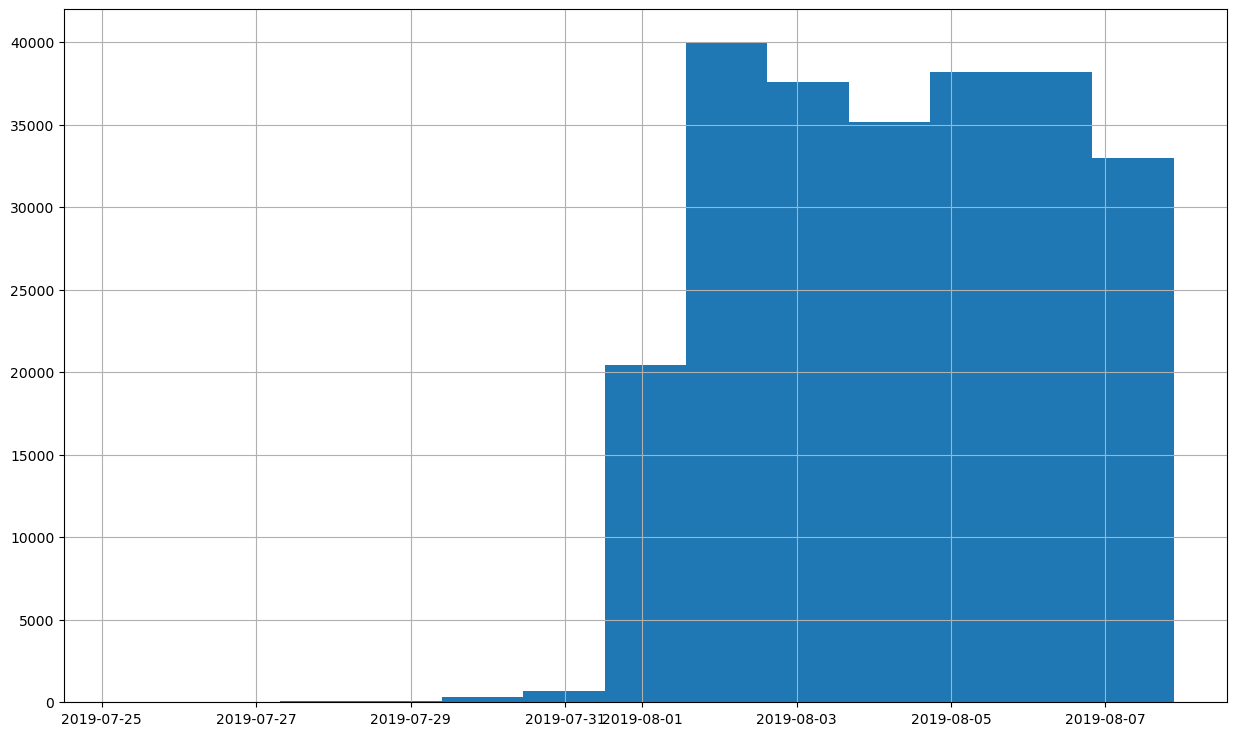

In [18]:
data['event_time'].hist(bins = 13, figsize = (15,9));

**Данные до 01.08.2019 являются неполными и их следует отбросить. Сделаем это, предварительно рассчитав, сколько строк будет удалено:**

In [19]:
print('Количество потерь по событиям:',len(data[data['event_date']<date(2019,8,1)]),'(',round(len(data[data['event_date']<date(2019,8,1)])/len(data)*100,1),'% )')

Количество потерь по событиям: 2826 ( 1.2 % )


In [20]:
print('Количество потерь по уникальным пользователям:',len(data['user_id'].unique())-len(data[data['event_date']>=date(2019,8,1)]['user_id'].unique()),'(',round((len(data['user_id'].unique())-len(data[data['event_date']>=date(2019,8,1)]['user_id'].unique()))/len(data['user_id'].unique())*100,1),'% )')

Количество потерь по уникальным пользователям: 17 ( 0.2 % )


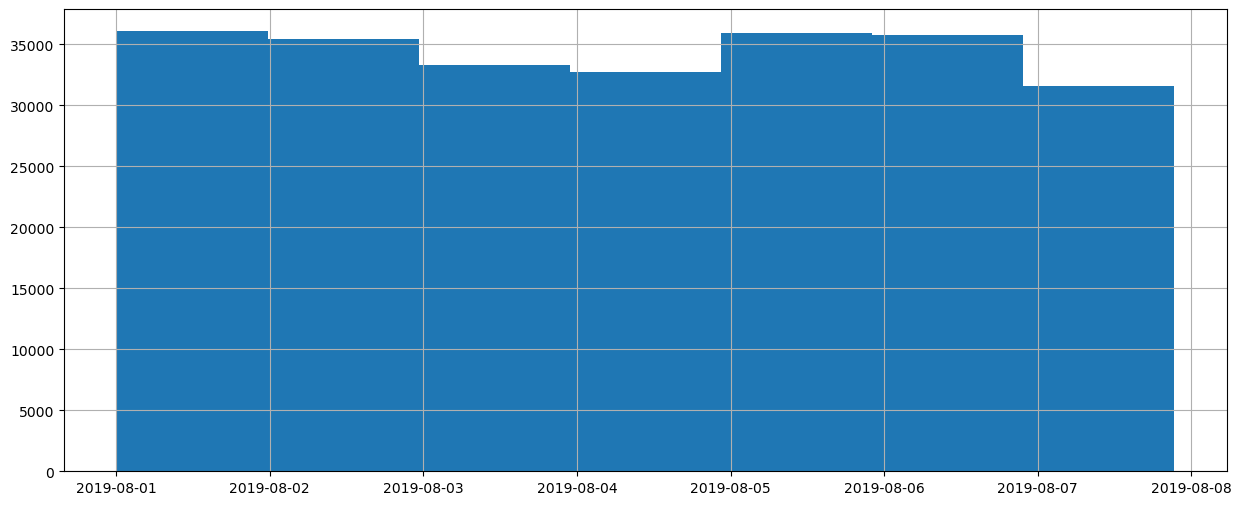

In [21]:

data = data[data['event_date']>=date(2019,8,1)]
data['event_time'].hist(bins = 7, figsize = (15,6));

**Теперь мы располагаем данными с 01.08.2019 по 07.08.2019**

**Проверим, что у нас есть пользователи из всех трёх экспериментальных групп:**

In [22]:
data.groupby('exp_id').count()

,event,user_id,event_time,event_date
exp_id,,,,
246,79302,79302,79302,79302
247,77022,77022,77022,77022
248,84563,84563,84563,84563


## Изучим воронку событий:

**Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте:**

In [23]:
data.groupby(['event']).count(). sort_values (by ='user_id', ascending = False)

,user_id,event_time,exp_id,event_date
event,,,,
MainScreenAppear,117328,117328,117328,117328
OffersScreenAppear,46333,46333,46333,46333
CartScreenAppear,42303,42303,42303,42303
PaymentScreenSuccessful,33918,33918,33918,33918
Tutorial,1005,1005,1005,1005


In [24]:
data['event'].value_counts() # так короче, но табличка некрасивая

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event, dtype: int64

**Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей:**

In [25]:
data.groupby(['event'])['user_id'].nunique().sort_values(ascending = False)

event
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

**Посчитаем долю пользователей, которые хоть раз совершали событие:**

In [26]:
funnel = round(data.groupby(['event'])['user_id'].nunique().sort_values(ascending = False)/data['user_id'].nunique(),2)
print (funnel)

event
MainScreenAppear           0.98
OffersScreenAppear         0.61
CartScreenAppear           0.50
PaymentScreenSuccessful    0.47
Tutorial                   0.11
Name: user_id, dtype: float64


**Предполагаю, что события происходят в следующем порядке:** <br>
<br>
    1. MainScreenAppear;<br>
    2. OffersScreenAppear;<br>
    3. CartScreenAppear;<br>
    4. PaymentScreenSuccessful.<br>
    Событие Tutorial, по смыслу может совершаться как в самом начале, так и после любого шага, который вызвал затруднение.<br>
    <br> **Думаю, что в последовательную цепочку выстраиваются все события за исключением Tutorial.**

In [27]:
print('C шага MainScreenAppear на шаг OffersScreenAppear переходят', round(funnel['OffersScreenAppear']/funnel['MainScreenAppear']*100,2),"% пользователей")

C шага MainScreenAppear на шаг OffersScreenAppear переходят 62.24 % пользователей


In [28]:
print('C шага OffersScreenAppear на шаг CartScreenAppear переходят', round(funnel['CartScreenAppear']/funnel['OffersScreenAppear']*100,2),"% пользователей")

C шага OffersScreenAppear на шаг CartScreenAppear переходят 81.97 % пользователей


In [29]:
print('C шага CartScreenAppear на шаг PaymentScreenSuccessful переходят', round(funnel['PaymentScreenSuccessful']/funnel['CartScreenAppear']*100,2),"% пользователей")

C шага CartScreenAppear на шаг PaymentScreenSuccessful переходят 94.0 % пользователей


**Больше всего пользователей теряется при переходе с MainScreenAppear на OffersScreenAppear, около 38 %.**

In [30]:
print('От первого события до оплаты доходят', round(funnel['PaymentScreenSuccessful']/funnel['MainScreenAppear']*100,2),"% пользователей")

От первого события до оплаты доходят 47.96 % пользователей


In [53]:
funnel_data = dict(
    number=list(data[data['event']!='Tutorial'].groupby(['event'])['user_id'].nunique().sort_values(ascending = False)),
    stage=["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"])
fig = px.funnel(funnel_data, x='number', y='stage', title = 'Воронка событий по числу уникальных пользователей')
fig.show()


## Изучим результаты эксперимента:

**Посчитаем количество пользователей в каждой экспериментальной группе:**

In [32]:
data.groupby('exp_id')['user_id'].nunique()

exp_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

In [33]:
data.groupby('exp_id')['user_id'].nunique().sum()

7534

**Теперь посмотрим, не входят ли пользователи одновлеменно в несколько групп:**

In [34]:
several_groups = data.groupby('user_id').agg({'exp_id' : 'nunique'}).query('exp_id>1')
print (len(several_groups))

0


**Проверим, находят ли статистические критерии разницу между выборками 246 и 247, будем использовать z-тест:**

**Сформулируем гипотезы. Нулевая гипотеза: различий в количестве уникальных пользователей в каждом событии между группами нет. Альтернативная гипотеза : различия в количестве уникальных пользователей в каждом событии между группами есть.**

**Посчитаем долю пользователей, совершивших разные события. Проверим, будет ли отличие между группами статистически достоверным:**

In [35]:
def zedtest(data, exp1, exp2, event_name): #создаем функцию, к которой будем обращаться для расчета z-критерия
        
        alpha = 0.05
        successes = np.array([len(data.loc[(data['exp_id'] == exp1)&(data['event'] == event_name)]['user_id'].unique()), len(data.loc[(data['exp_id'] == exp2)&(data['event'] == event_name)]['user_id'].unique())])
        trials = np.array([len(data.loc[data['exp_id'] == exp1]['user_id'].unique()), len(data.loc[data['exp_id'] == exp2]['user_id'].unique())])
        
        # пропорция успехов в первой группе:
        p1 = successes[0]/trials[0]
        
        # пропорция успехов во второй группе:
        p2 = successes[1]/trials[1]

        # пропорция успехов в комбинированном датасете:
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

        # разница пропорций в датасетах
        difference = p1 - p2 

       # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)  
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('Доля пользователей, совершивших это событие в первой группе:',p1)
        print('Доля пользователей, совершивших это событие во второй группе:',p2)  
        print('p-значение: ', p_value)

        if p_value < alpha:
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print(
                'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
            ) 

In [36]:
zedtest(data,246,247,'MainScreenAppear') 

Доля пользователей, совершивших это событие в первой группе: 0.9863123993558777
Доля пользователей, совершивших это событие во второй группе: 0.9852765618782332
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [37]:
zedtest(data,246,247,'OffersScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.6207729468599034
Доля пользователей, совершивших это событие во второй группе: 0.6048547552725826
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [38]:
zedtest(data,246,247,'CartScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.5096618357487923
Доля пользователей, совершивших это событие во второй группе: 0.4926382809391166
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [39]:
zedtest(data,246,247,'PaymentScreenSuccessful')

Доля пользователей, совершивших это событие в первой группе: 0.4830917874396135
Доля пользователей, совершивших это событие во второй группе: 0.46080382013529647
p-значение:  0.11456679313141849
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:  статистически значимых отличий между выборками 246 и 247 нет**

**Сравним группу с изменённым шрифтом (248) с контрольной группой 246:**

In [40]:
zedtest(data,246,248,'MainScreenAppear') 

Доля пользователей, совершивших это событие в первой группе: 0.9863123993558777
Доля пользователей, совершивших это событие во второй группе: 0.9826566811194324
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [41]:
zedtest(data,246,248,'OffersScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.6207729468599034
Доля пользователей, совершивших это событие во второй группе: 0.6034686637761135
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [42]:
zedtest(data,246,248,'CartScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.5096618357487923
Доля пользователей, совершивших это событие во второй группе: 0.48482459597950334
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [43]:
zedtest(data,246,248,'PaymentScreenSuccessful')

Доля пользователей, совершивших это событие в первой группе: 0.4830917874396135
Доля пользователей, совершивших это событие во второй группе: 0.46551044540796216
p-значение:  0.2122553275697796
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод:  статистически значимых отличий между выборками 246 и 248 нет**

**Сравним группу с изменённым шрифтом (248) с контрольной группой 247:**

In [44]:
zedtest(data,247,248,'MainScreenAppear') 

Доля пользователей, совершивших это событие в первой группе: 0.9852765618782332
Доля пользователей, совершивших это событие во второй группе: 0.9826566811194324
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [45]:
zedtest(data,247,248,'OffersScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.6048547552725826
Доля пользователей, совершивших это событие во второй группе: 0.6034686637761135
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [46]:
zedtest(data,247,248,'CartScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.4926382809391166
Доля пользователей, совершивших это событие во второй группе: 0.48482459597950334
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [47]:
zedtest(data,247,248,'PaymentScreenSuccessful')

Доля пользователей, совершивших это событие в первой группе: 0.46080382013529647
Доля пользователей, совершивших это событие во второй группе: 0.46551044540796216
p-значение:  0.7373415053803964
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Сравним группу с изменённым шрифтом (248) с объединенной контрольной группой:**

In [48]:
data_merged = data
data_merged.loc[data_merged['exp_id']==246, 'exp_id'] = 247 

In [49]:
zedtest(data_merged,247,248,'MainScreenAppear') 

Доля пользователей, совершивших это событие в первой группе: 0.9857914748849309
Доля пользователей, совершивших это событие во второй группе: 0.9826566811194324
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [50]:
zedtest(data_merged,247,248,'OffersScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.6127676605963578
Доля пользователей, совершивших это событие во второй группе: 0.6034686637761135
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [51]:
zedtest(data_merged,247,248,'CartScreenAppear')

Доля пользователей, совершивших это событие в первой группе: 0.5011006603962378
Доля пользователей, совершивших это событие во второй группе: 0.48482459597950334
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [52]:
zedtest(data_merged,247,248,'PaymentScreenSuccessful')

Доля пользователей, совершивших это событие в первой группе: 0.47188312987792674
Доля пользователей, совершивших это событие во второй группе: 0.46551044540796216
p-значение:  0.6004294282308704
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**При проверке статистических гипотез был выбран уровень значимости  alpha = 0.05. При таком уровне значимости каждый 20ый раз можно получать ложный результат. Всего сделано 16 проверок статистических гипотез.**

**В текущей задаче можно было бы использовать поправку Холма или Шидака, которые по-разному, но снижают уровень статистической значимости alpha в зависимости от количества проверяемых гипотез. В нашем случае эти поправки только усилили бы выводы, так как p-значение во всех случаях получилось больше alpha. Поправку Бонферрони при таком количестве гипотез лучше не применять, так как сильно увеличится вероятность ошибки второго рода.**

## Вывод: <br> <br>Cтатистически значимых отличий между группой с измененным шрифтом и объединенной контрольной группой нет.